In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\himan\OneDrive\Desktop\retail_sales_dataset.csv")

In [3]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,5/16/2023,CUST996,Male,62,Clothing,1,50,50
996,997,11/17/2023,CUST997,Male,52,Beauty,3,30,90
997,998,10/29/2023,CUST998,Female,23,Beauty,4,25,100
998,999,12/5/2023,CUST999,Female,36,Electronics,3,50,150


In [88]:
gender_behavior = df.groupby('Gender').agg(
    Total_Revenue=('Total Amount', 'sum'),
    Average_Ticket_Size=('Total Amount', 'mean'),
    Total_Transactions=('Transaction ID', 'count')
)

In [89]:
age_values = [18, 25, 35, 45, 55, 100]
age_range = ['18-24', '25-34', '35-44', '45-54', '55+']
df['Age Group'] = pd.cut(df['Age'], bins=age_values, labels=age_range, right=False)

age_behavior = df.groupby('Age Group', observed=False).agg(
    Total_Revenue=('Total Amount', 'sum'),
    Average_Spend=('Total Amount', 'mean')
)

In [90]:
category_preference = pd.crosstab(
    index=df['Gender'], 
    columns=df['Product Category'], 
    values=df['Total Amount'], 
    aggfunc='sum'
).fillna(0)

In [91]:
print("--- Gender Influence ---")
print(gender_behavior)
print("\n--- Age Influence ---")
print(age_behavior)
print("\n--- Category Spending by Gender ---")
print(category_preference)

--- Gender Influence ---
        Total_Revenue  Average_Ticket_Size  Total_Transactions
Gender                                                        
Female         232840           456.549020                 510
Male           223160           455.428571                 490

--- Age Influence ---
           Total_Revenue  Average_Spend
Age Group                              
18-24              74650     501.006711
25-34              97090     478.275862
35-44              96835     467.801932
45-54              97235     432.155556
55+                90190     417.546296

--- Category Spending by Gender ---
Product Category  Beauty  Clothing  Electronics
Gender                                         
Female             74830     81275        76735
Male               68685     74305        80170


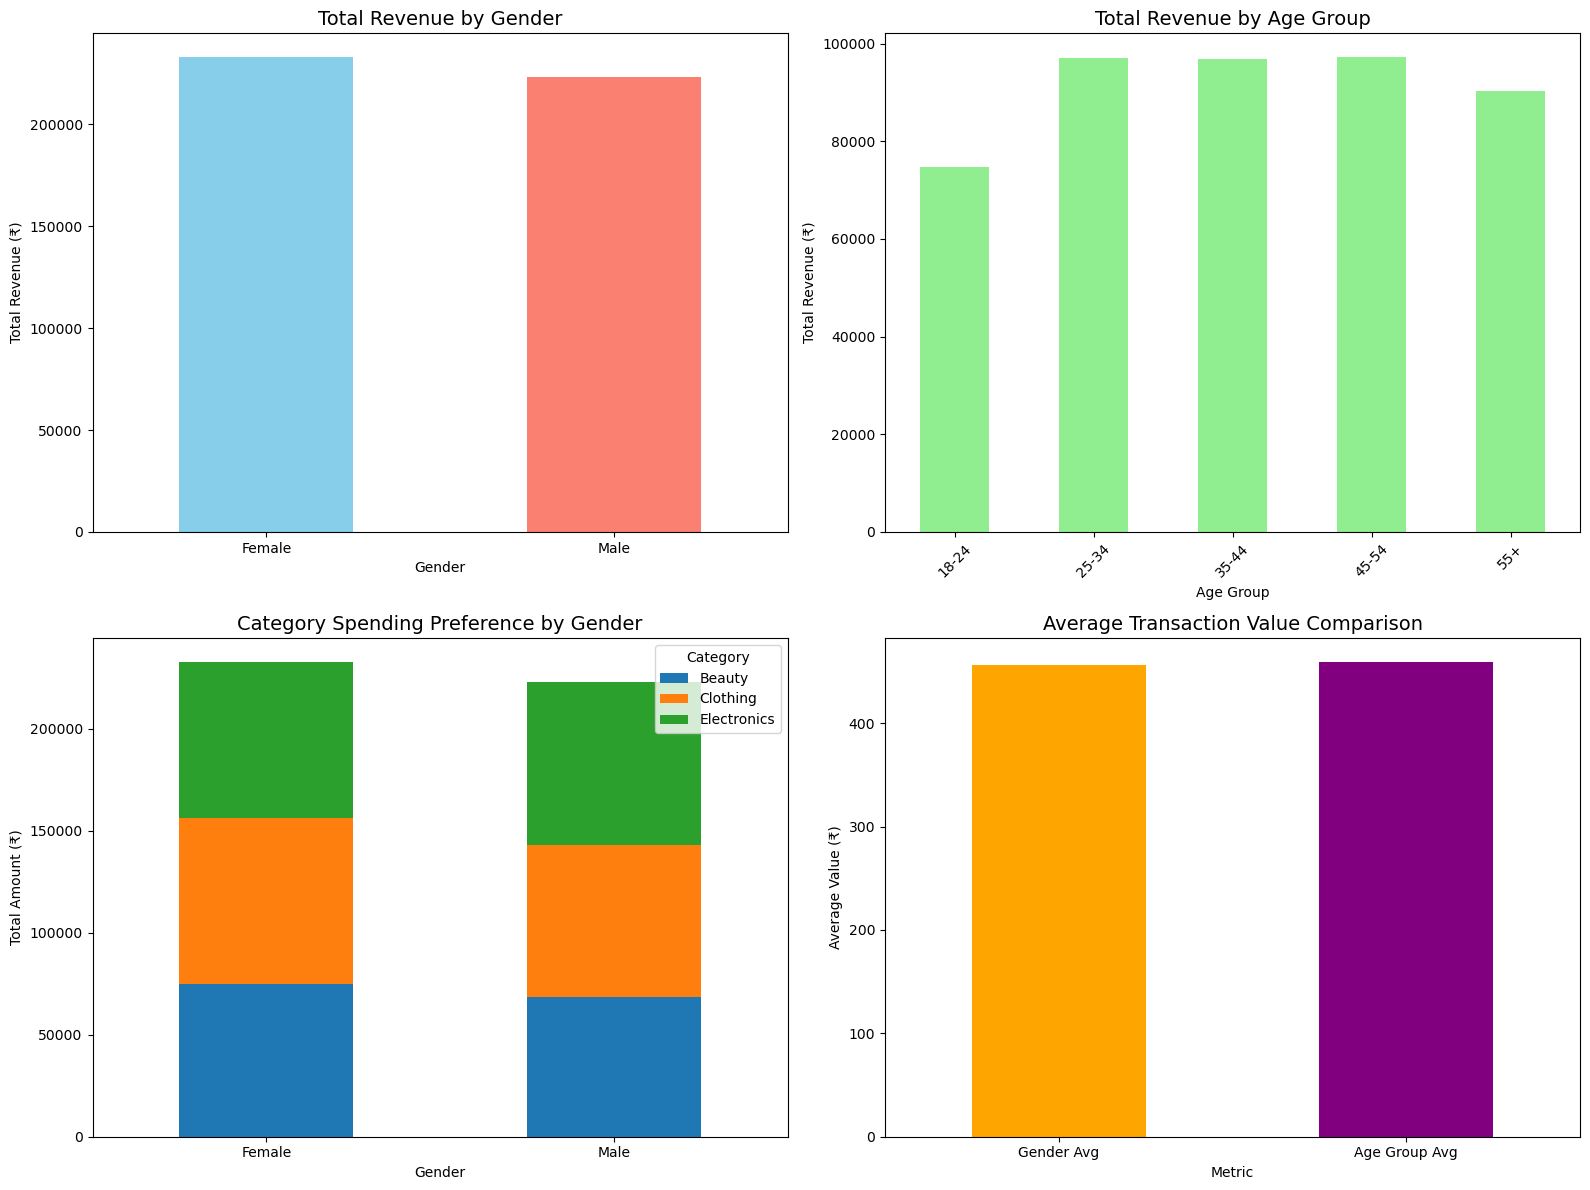

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Total Revenue by Gender
gender_behavior['Total_Revenue'].plot(kind='bar', ax=axes[0, 0], color=['skyblue', 'salmon'])
axes[0, 0].set_title('Total Revenue by Gender', fontsize=14)
axes[0, 0].set_ylabel('Total Revenue (₹)')
axes[0, 0].tick_params(axis='x', rotation=0)

# Plot 2: Total Revenue by Age Group
age_behavior['Total_Revenue'].plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Total Revenue by Age Group', fontsize=14)
axes[0, 1].set_ylabel('Total Revenue (₹)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Category Preference by Gender (Stacked)
category_preference.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Category Spending Preference by Gender', fontsize=14)
axes[1, 0].set_ylabel('Total Amount (₹)')
axes[1, 0].legend(title='Category', loc='upper right')
axes[1, 0].tick_params(axis='x', rotation=0)

# Plot 4: Average Spend Metrics
metrics_df = pd.DataFrame({
    'Metric': ['Gender Avg', 'Age Group Avg'],
    'Value': [gender_behavior['Average_Ticket_Size'].mean(), age_behavior['Average_Spend'].mean()]
})
metrics_df.plot(kind='bar', x='Metric', y='Value', ax=axes[1, 1], color=['orange', 'purple'], legend=False)
axes[1, 1].set_title('Average Transaction Value Comparison', fontsize=14)
axes[1, 1].set_ylabel('Average Value (₹)')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

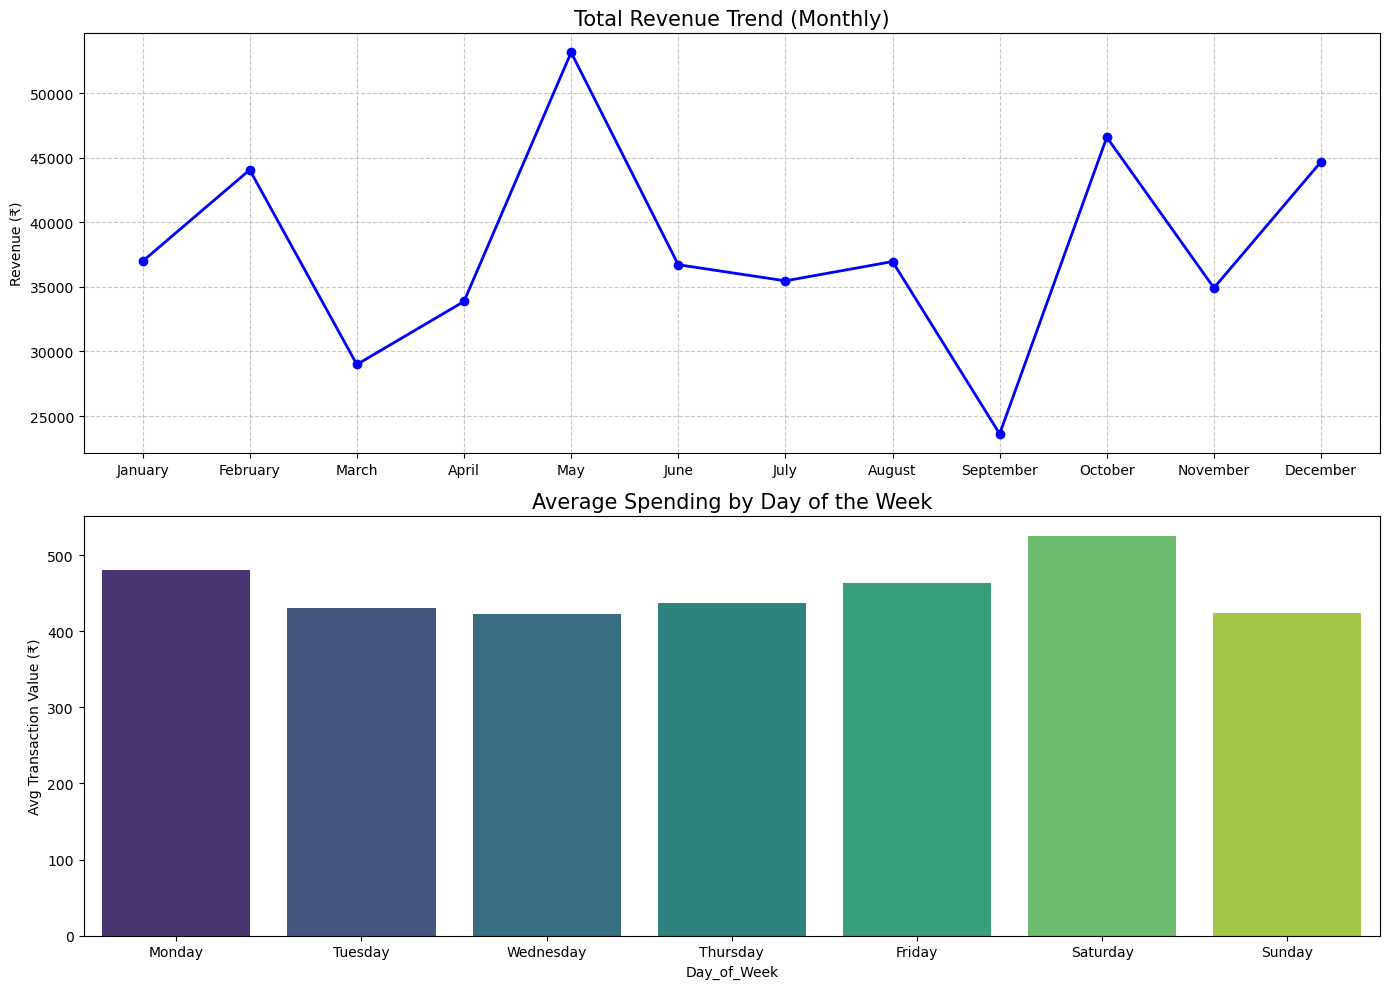

In [95]:
# 1. Load data and convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# 2. Extract time features
df['Month_Num'] = df['Date'].dt.month 
df['Month'] = df['Date'].dt.month_name()
df['Day_of_Week'] = df['Date'].dt.day_name()

# 3. Monthly Sales Trend (Sorted by Calendar Month)
monthly_sales = df.groupby(['Month_Num', 'Month'])['Total Amount'].sum().reset_index()

# 4. Weekly Sales Pattern
weekly_sales = df.groupby('Day_of_Week')['Total Amount'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# 5. Fig Size
plt.figure(figsize=(14, 10))

# Subplot 1: Monthly Revenue Growth
plt.subplot(2, 1, 1)
plt.plot(monthly_sales['Month'], monthly_sales['Total Amount'], marker='o', color='b', linewidth=2)
plt.title('Total Revenue Trend (Monthly)', fontsize=15)
plt.ylabel('Revenue (₹)')
plt.grid(True, linestyle='--', alpha=0.7)

# Subplot 2: Day of the Week Performance (FIXED LINE BELOW)
plt.subplot(2, 1, 2)
sns.barplot(
    x=weekly_sales.index, 
    y=weekly_sales.values, 
    hue=weekly_sales.index, 
    palette='viridis',                  
)
plt.title('Average Spending by Day of the Week', fontsize=15)
plt.ylabel('Avg Transaction Value (₹)')

plt.tight_layout()
plt.show()

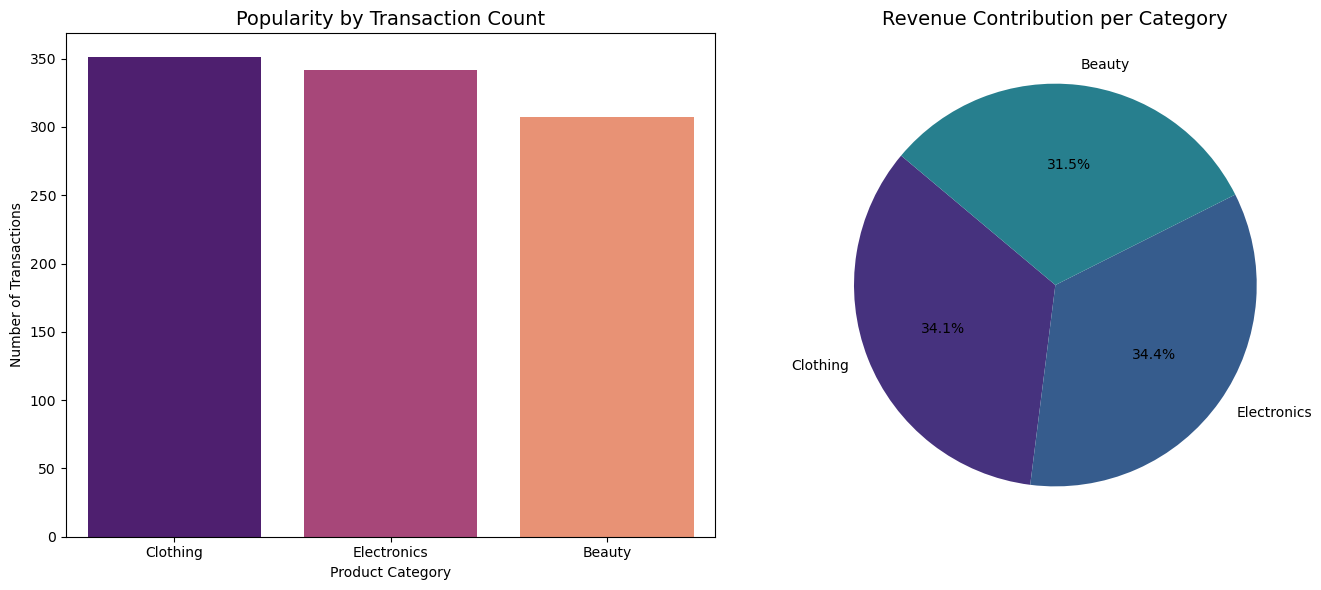

                  Transaction_Count  Total_Revenue
Product Category                                  
Clothing                        351         155580
Electronics                     342         156905
Beauty                          307         143515


In [76]:
# 1. Calculate Popularity Metrics
# We count occurrences for volume and sum the 'Total Amount' for revenue
category_popularity = df.groupby('Product Category').agg(
    Transaction_Count=('Transaction ID', 'count'),
    Total_Revenue=('Total Amount', 'sum')
).sort_values(by='Transaction_Count', ascending=False)

# 2. Visualizing Popularity
plt.figure(figsize=(14, 6))

# Subplot 1: Popularity by Transaction Volume (Quantity/Frequency)
plt.subplot(1, 2, 1)
sns.barplot(
    x=category_popularity.index, 
    y=category_popularity['Transaction_Count'], 
    hue=category_popularity.index,
    palette='magma',
    legend=False
)
plt.title('Popularity by Transaction Count', fontsize=14)
plt.ylabel('Number of Transactions')

# Subplot 2: Popularity by Revenue Contribution
plt.subplot(1, 2, 2)
# Using a Pie Chart to show the "Share of Wallet"
plt.pie(
    category_popularity['Total_Revenue'], 
    labels=category_popularity.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('viridis')
)
plt.title('Revenue Contribution per Category', fontsize=14)

plt.tight_layout()
plt.show()

print(category_popularity)

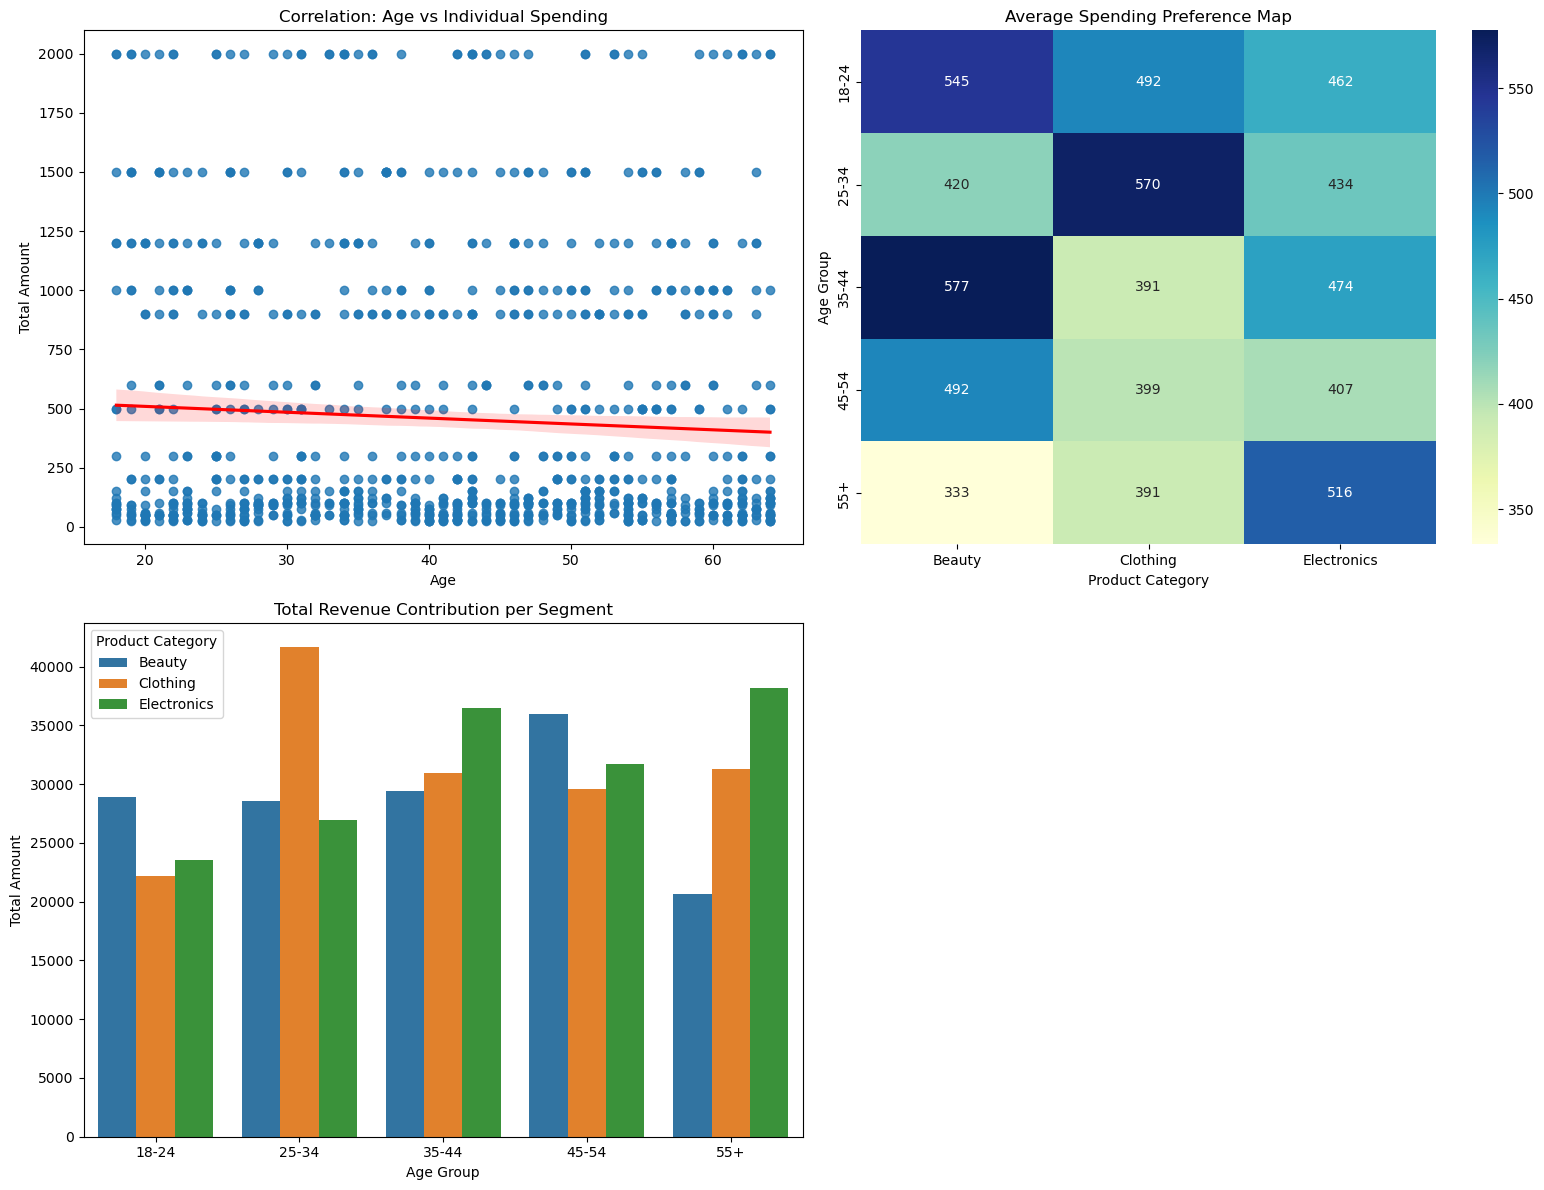

In [80]:
age_values = [18, 25, 35, 45, 55, 100]
age_range = ['18-24', '25-34', '35-44', '45-54', '55+']
df['Age Group'] = pd.cut(df['Age'], bins=age_values, labels=age_range, right=False)

# Create a preference map (Average spending by Age vs Category)
preference_map = df.pivot_table(
    index='Age Group', 
    columns='Product Category', 
    values='Total Amount', 
    aggfunc='mean',
    observed=False
).fillna(0)

# 2. Visualizing Relationships
plt.figure(figsize=(16, 12))

# Subplot 1: Regression (Age vs Total Amount)
plt.subplot(2, 2, 1)
sns.regplot(data=df, x='Age', y='Total Amount', line_kws={'color':'red'})
plt.title('Correlation: Age vs Individual Spending')

# Subplot 2: Heatmap (Preference Mapping)
plt.subplot(2, 2, 2)
sns.heatmap(preference_map, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Average Spending Preference Map')

# Subplot 3: Revenue Composition
plt.subplot(2, 2, 3)
rev_data = df.groupby(['Age Group', 'Product Category'], observed=False)['Total Amount'].sum().reset_index()
sns.barplot(data=rev_data, x='Age Group', y='Total Amount', hue='Product Category')
plt.title('Total Revenue Contribution per Segment')

plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

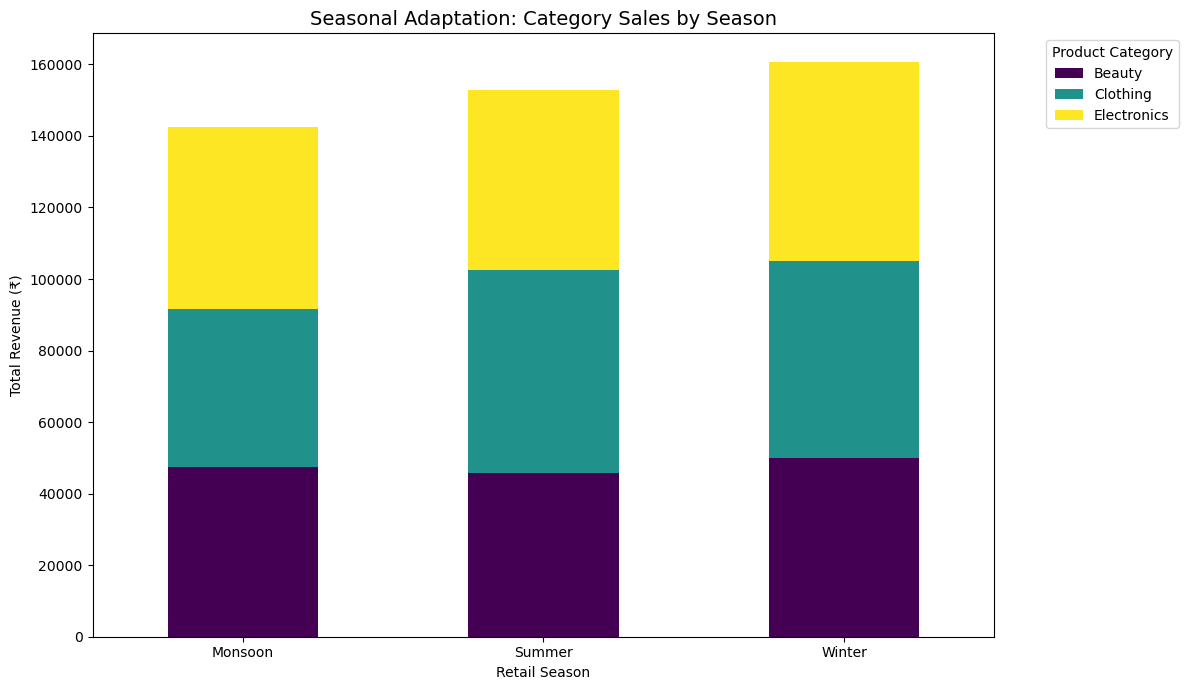

Seasonal Revenue Breakdown:
Product Category  Beauty  Clothing  Electronics
Season                                         
Monsoon            47555     43995        51075
Summer             45895     56630        50200
Winter             50065     54955        55630


In [83]:
# 1. Define a function to map months to seasons
def get_season(month):
    if month in [11,12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5,6]: return 'Summer'
    elif month in [7, 8, 9, 10]: return 'Monsoon'
    else: return 'error'

# 2. Process the data
df['Date'] = pd.to_datetime(df['Date'])
df['Month_Num'] = df['Date'].dt.month
df['Season'] = df['Month_Num'].apply(get_season)

# 3. Analyze Seasonal Product Preferences
seasonal_pivot = df.pivot_table(
    index='Season', 
    columns='Product Category', 
    values='Total Amount', 
    aggfunc='sum'
).fillna(0)

# 4. Visualization
plt.figure(figsize=(12, 7))
seasonal_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,7))

plt.title('Seasonal Adaptation: Category Sales by Season', fontsize=14)
plt.ylabel('Total Revenue (₹)')
plt.xlabel('Retail Season')
plt.xticks(rotation=0)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Seasonal Revenue Breakdown:")
print(seasonal_pivot)

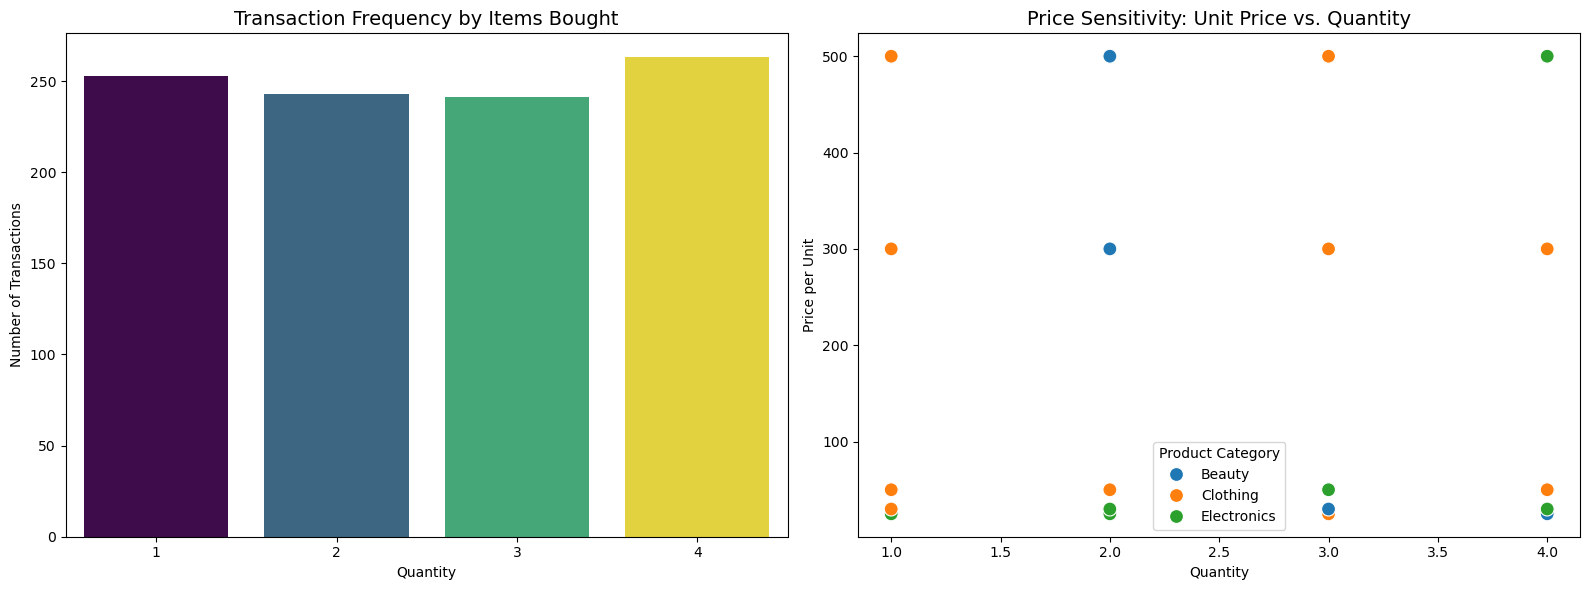

In [86]:
# 1. Grouping metrics by Quantity
qty_behavior = df.groupby('Quantity').agg(
    Avg_Price_Unit=('Price per Unit', 'mean'),
    Avg_Total_Amount=('Total Amount', 'mean'),
    Transaction_Count=('Transaction ID', 'count')
).reset_index()

# 2. Visualization
plt.figure(figsize=(16, 6))

# Subplot 1: Transaction Frequency (FIXED LINE)
plt.subplot(1, 2, 1)
sns.barplot(
    data=qty_behavior, 
    x='Quantity', 
    y='Transaction_Count', 
    hue='Quantity',   
    palette='viridis', 
    legend=False        
)
plt.title('Transaction Frequency by Items Bought', fontsize=14)
plt.ylabel('Number of Transactions')

# Subplot 2: Price Sensitivity
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Quantity', y='Price per Unit', hue='Product Category', s=100)
plt.title('Price Sensitivity: Unit Price vs. Quantity', fontsize=14)

plt.tight_layout()
plt.show()

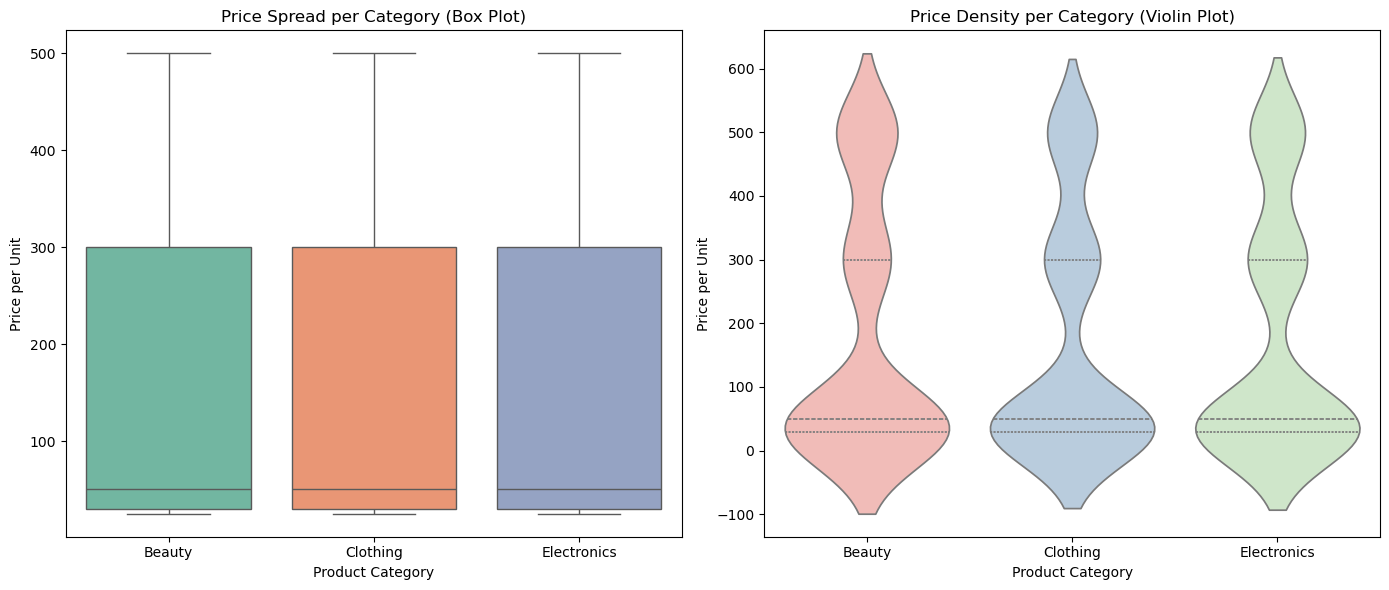

                  count        mean         std   min   25%   50%    75%  \
Product Category                                                           
Beauty            307.0  184.055375  194.929399  25.0  30.0  50.0  300.0   
Clothing          351.0  174.287749  186.017065  25.0  30.0  50.0  300.0   
Electronics       342.0  181.900585  189.049673  25.0  30.0  50.0  300.0   

                    max  
Product Category         
Beauty            500.0  
Clothing          500.0  
Electronics       500.0  


In [87]:
# 1. Descriptive Statistics by Category
# Provides count, mean, std deviation, min, and max prices
price_stats = df.groupby('Product Category')['Price per Unit'].describe()

# 2. Visualization
plt.figure(figsize=(14, 6))

# Box Plot: Highlights the range and outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Product Category', y='Price per Unit', hue='Product Category', palette='Set2')
plt.title('Price Spread per Category (Box Plot)')

# Violin Plot: Shows where most products are priced (density)
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='Product Category', y='Price per Unit', hue='Product Category', palette='Pastel1', inner='quart')
plt.title('Price Density per Category (Violin Plot)')

plt.tight_layout()
plt.show()

print(price_stats)